# Práctica Aprendizaje Compacional - Lung Cancer

# Description

In this project supervised machine learning models were applied to lung cancer prognosis prediction. The dataset Lung Cancer Data downloaded from www.kaggle.com was used.

# Objetives

- Apply exploratory descriptive analysis (EDA)
- Apply preprocessing data techniques
- Apply scale data techniques
- Adress class imbalance
- Apply SVM, MLP, Adaboost and KNN models
- Apply tuning hyperparameters techniques
- Evaluate models
- Evaluate results 


## 1. Exploración inicial 

In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
df = pd.read_csv('lung_cancer.csv')

In [3]:
type(df)

pandas.core.frame.DataFrame

#### Nombre de las variables

In [4]:
df.columns.values

array(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ',
       'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'], dtype=object)

#### Visualizamos las cinco primeras filas del dataset

In [5]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Renombramos la variable LUNG_CANCER como Target

In [6]:
df = df.rename(columns={'LUNG_CANCER':'Target'})

#### Lectura de la variable "target"

In [7]:
df['Target'].value_counts()
# YES : Lung Cancer Positive
# NO : Lung Cancer Negative

YES    270
NO      39
Name: Target, dtype: int64

Por la proporción de las clases determinamos que **existe desbalanceo** de clases en nuestro dataset.

#### Metadatos 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  Target                 

Exceptuando GENDER el resto de variables son de tipo númerico. 

Posteriormente procederemos a codificar GENDER. 

La codificación de variables categoricas es necesario para poder aplicar sobre estos los distintos modelos de machine learning.

#### Información estadística del dataset

In [9]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


Exceptuando la variable Edad, el resto de varibles se situan en el mismo rango. 

Aún siendo una sola variable la que se encuentra en un rango distinto, podría tener un efecto no deseado en las predicciones de los algoritmos aplicados. Tendremos esto último en cuenta en el procesamiento de datos.

#### Mapa de calor para visualizar las correlaciones entre variables

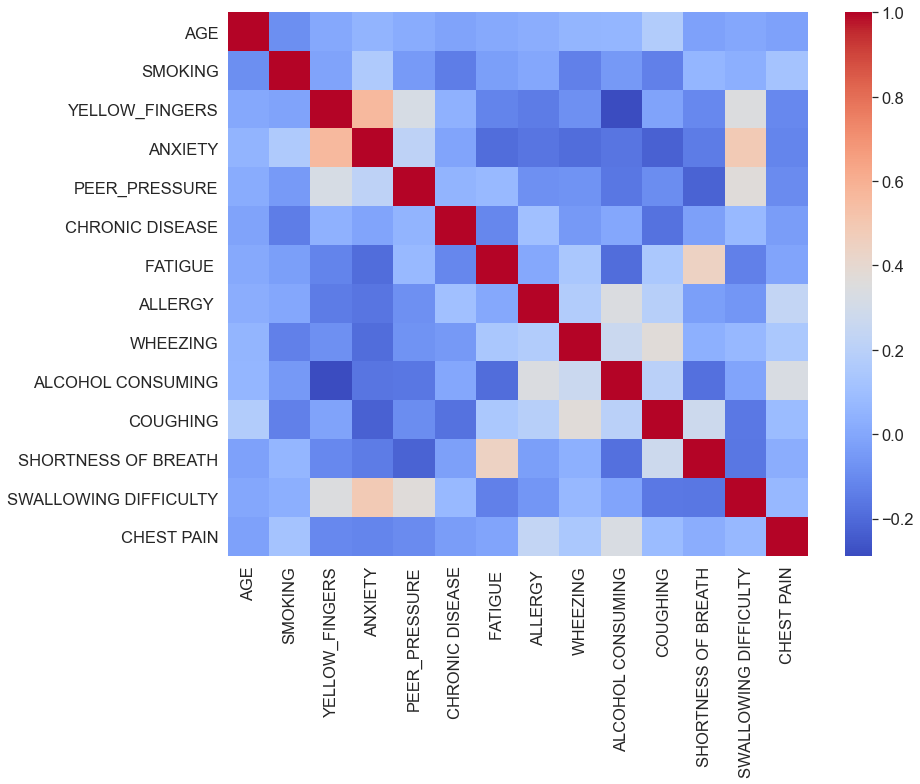

In [10]:
sns.set_style('darkgrid')
sns.set(font_scale=1.5)


corr = df.corr()
_, ax = plt.subplots(figsize=(13,10)) 

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap='coolwarm')

A través de mapa de calor de correlaciones podemos ver el grado de influencia que tiene una variable respecto de otra.

En relación a la variable Target vemos como algunas variables tienen mas influencia que otras en su resultado. Concretamente podemos ver una mayor influencia de las variables ALLERGY, ALCOHOL CONSUMING Y COUGHING sobre Target. 

In [11]:
#### Codificamos variables categoricas

In [12]:
dummies = pd.get_dummies(df.GENDER, prefix='GENDER' )
df = pd.concat([df,dummies], axis='columns')
df = df.drop(['GENDER'], axis = 'columns')

df['Target'].replace(['YES', 'NO'], [1,0], inplace=True)

#### Dimensiones del dataset

In [13]:
df.shape

(309, 17)

## 2. Pre-procesamiento 

#### Suma de valores nulos en las variables

In [14]:
df.isnull().sum()

AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
Target                   0
GENDER_F                 0
GENDER_M                 0
dtype: int64

La ausencia de valores nulos evita que tengamos que aplicar técnicas de imputación sobre el dataset.

## 3. Preparación de los datos

#### Separamos conjunto de training y test

In [15]:
df.features = df.drop(['Target'], axis=1)
X = df.features
y = df['Target']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.30, random_state = 20, stratify=y)

<ipython-input-15-e64f32f0bcf4>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.features = df.drop(['Target'], axis=1)


Dividimos el conjunto de datos en training 70% y test 30%. La distribución de las clases es estratificada.

In [16]:
print('Distribución clases training')
train_y.value_counts()

Distribución clases training


1    189
0     27
Name: Target, dtype: int64

In [17]:
print('Distribución clases test')
test_y.value_counts()

Distribución clases test


1    81
0    12
Name: Target, dtype: int64

#### Estandarización de los datos

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
train_X_st = ss.fit_transform(train_X)
test_X_st = ss.transform(test_X)

Como mencinamos anteriormente la variable EDAD tiene un rango de valores distinto al resto pudiendo provocar bias hacia esta variable. Con la estandarización evitamos la influencia de la variable EDAD. 

#### Tratamiento desbalanceo de clases

Con el tratamiento del desbalance de clases evitamos que los modelos aprendan en 'exceso' de la clase mayoritaria y por generalizen erróneamente.

##### SMOTE-TOMEK


Con las muestras sintéticas generadas por SMOTE-TOMEK evitamos que el algoritmo aprenda de copias de las instancias ya existentes y por consiguiente propiciando overfitting. Con SMOTE-TOMEK las muestras generadas son determinadas a partir de las instancias más cercanas del grupo minoritario añadiendo instancias en una linea recta entre estos. Con TOMEK aplica undersampling mejorando los limites de decisión del conjunto de datos.

In [19]:
from imblearn.combine import SMOTETomek

os_us = SMOTETomek(random_state = 0)
train_X_com, train_y_com = os_us.fit_resample(train_X, train_y)

## Aplicamos undersampling en conjunto de entrenamiento estandarizado
train_X_com_st, train_y_com_st = os_us.fit_resample(train_X_st, train_y)

print('Before SMOTE-TOMEK')
train_y.value_counts()

Before SMOTE-TOMEK


1    189
0     27
Name: Target, dtype: int64

In [20]:
print('After SMOTE-TOMEK')
train_y_com.value_counts()

After SMOTE-TOMEK


0    184
1    184
Name: Target, dtype: int64

## 4. Selección y entrenamiento de los modelos

Seleccionamos los algoritmos KNN, AdaBoost, Multilayer Perceptron y SVM. 

Para cada unos de los algoritmos creamos tres modelos distintos diferenciandose por el tratamieno de los datos de entrada. 

Diferenciamos tres tipos de datos de entradas:datos originales, datos estandarizados y datos estandarizados con clases balanceadas. 

Una vez creados y entrenados los distintos modelos validaremos sus resultados con la técnica Cross-Validation teniendo como métrica de evaluación AUC y ACC. 

La elección de ACC y AUC tiene como fin el evitar obtener conclusiones que puedan ser sesgadas por la distribución de los datos. 

Obtener conclusiones de una única métrica puede llevar a falsas conclusiones sobre el modelo el cuestión. Concretamente en el caso de ACC sabemos que en datasets con desbalanceo de clases no es del todo fiable. AUC es una métrica usada en problemas de clasificación binaria. Evalúa la capacidad que tiene el modelo para distinguir entre clases positivas y negativas. 

#### KNN

In [21]:
## KNN con datos sin estandarizar
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_X, train_y)
pred_y_knn = knn.predict(test_X)
knn_auc = cross_val_score(knn,train_X, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
knn_acc = cross_val_score(knn,train_X, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('AUC KNN:', mean(knn_auc))
print('ACC KNN:', mean(knn_acc))
print()
## KNN con datos estandarizados
knn_stn = KNeighborsClassifier(n_neighbors=3)
knn_stn.fit(train_X_st, train_y)
pred_y_knn_stn = knn_stn.predict(test_X_st)
knn_stn_auc = cross_val_score(knn_stn,train_X_st, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC KNN_std :',mean(knn_stn_auc))
knn_stn_acc = cross_val_score(knn_stn,train_X_st, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC KNN_std :',mean(knn_stn_acc))
print()
## KNN con datos estandarizados y desbalanceo de clases tratado
knn_stn_st = KNeighborsClassifier(n_neighbors=3)
knn_stn_st.fit(train_X_com_st, train_y_com_st)
pred_y_knn_stn_st = knn_stn_st.predict(train_X_com_st)
knn_stn_st_auc = cross_val_score(knn_stn_st,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC KNN_std_st:',mean(knn_stn_st_auc))
knn_stn_st_acc = cross_val_score(knn_stn_st,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC KNN_std_st:',mean(knn_stn_st_acc))

AUC KNN: 0.7450779727095518
ACC KNN: 0.8941558441558441

AUC KNN_std : 0.8406920077972708
ACC KNN_std : 0.885064935064935

AUC KNN_std_st: 0.956294244382887
ACC KNN_std_st: 0.9153627311522049


### AdaBoost

In [22]:
## AdaBoost con datos sin estandarizar
ms = AdaBoostClassifier(n_estimators=100)
ms.fit(train_X, train_y)
pred_y_ms = ms.predict(test_X)
ms_auc = cross_val_score(ms,train_X, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC AB:', mean(ms_auc))
ms_acc = cross_val_score(ms,train_X, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC AB:', mean(ms_acc))
print()
## AdaBoost con datos estandarizados
ms_stn = AdaBoostClassifier(n_estimators=100)
ms_stn.fit(train_X_st, train_y)
pred_y_ms_stn = ms_stn.predict(test_X_st)
ms_stn_auc = cross_val_score(ms_stn,train_X_st, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC AB_stn:', mean(ms_stn_auc))
ms_stn_acc = cross_val_score(ms_stn,train_X_st, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC AB_stn:', mean(ms_stn_acc))
print()
## AdaBoost con datos estandarizados y desbalanceo de clases tratado
ms_stn_st = AdaBoostClassifier(n_estimators=100)
ms_stn_st.fit(train_X_com_st, train_y_com_st)
pred_y_ms_stn_st = ms_stn_st.predict(train_X_com_st)
ms_stn_st_auc = cross_val_score(ms_stn_st,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC AB_stn_st:', mean(ms_stn_st_auc))
ms_stn_st_acc = cross_val_score(ms_stn_st,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC AB_stn_st:', mean(ms_stn_st_acc))

AUC AB: 0.8166666666666668
ACC AB: 0.8805194805194805

AUC AB_stn: 0.8166666666666668
ACC AB_stn: 0.8805194805194805

AUC AB_stn_st: 0.9770083102493075
ACC AB_stn_st: 0.9235419630156473


### MultiLayer Perceptron

In [23]:
## MLP con datos sin estandarizar
ml = MLPClassifier(random_state=1, max_iter=300)
ml.fit(train_X, train_y)
pred_y_ml = ml.predict(test_X)
ml_auc = cross_val_score(ml,train_X, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC ML:', mean(ml_auc))
ml_acc = cross_val_score(ml,train_X, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC ML:', mean(ml_acc))
print()
## MLP con datos estandarizados
ml_stn = MLPClassifier(random_state=1, max_iter=300)
ml_stn.fit(train_X_st, train_y)
pred_y_ml_stn = ml_stn.predict(test_X_st)
ml_stn_auc = cross_val_score(ml_stn,train_X_st, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC ML_stn:', mean(ms_stn_auc))
ml_stn_acc = cross_val_score(ml_stn,train_X_st, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC ML_stn:', mean(ms_stn_acc))
print()
## MLP con datos estandarizados y desbalanceo de clases tratado
ml_stn_st = MLPClassifier(random_state=1, max_iter=300)
ml_stn_st.fit(train_X_com_st, train_y_com_st)
pred_y_ml_stn_st = ml_stn_st.predict(train_X_com_st)
ml_stn_st_auc = cross_val_score(ml_stn_st,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC ML_stn_st:', mean(ml_stn_st_auc))
ml_stn_st_acc = cross_val_score(ml_stn_st,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC ML_stn_st:', mean(ml_stn_st_acc))

C:\Users\aleja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC ML: 0.8920077972709551
ACC ML: 0.8943722943722945



C:\Users\aleja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC ML_stn: 0.8166666666666668
ACC ML_stn: 0.8805194805194805



C:\Users\aleja\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC ML_stn_st: 0.9758848876577408
ACC ML_stn_st: 0.9446657183499289


### SVM

In [24]:
## SVM con datos sin estandarizar
svm = SVC(gamma='auto')
svm.fit(train_X, train_y)
pred_y_svm = svm.predict(test_X)
svm_auc = cross_val_score(svm, train_X, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC SVM:', mean(svm_auc))
svm_acc = cross_val_score(svm, train_X, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC SVM:', mean(svm_acc))
print()
## SVM con datos estandarizados
svm_stn = SVC(gamma='auto')
svm_stn.fit(train_X_st, train_y)
pred_y_svm = svm_stn.predict(test_X_st)
svm_stn_auc = cross_val_score(svm_stn,train_X_st, train_y, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC SVM_stn:', mean(svm_stn_auc))
svm_stn_acc = cross_val_score(svm_stn,train_X_st, train_y, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC SVM_stn:', mean(svm_stn_acc))
print()
## SVM con datos estandarizados y desbalanceo de clases tratado
svm_stn_st = SVC(gamma='auto')
svm_stn_st.fit(train_X_com_st, train_y_com_st)
pred_y_svm_stn_st = svm_stn_st.predict(train_X_com_st)
pred_y_svm_stn_st_test = svm_stn_st.predict(test_X_st)
svm_stn_st_auc = cross_val_score(svm_stn_st,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC SVM_stn_st:', mean(svm_stn_st_auc))
svm_stn_st_acc = cross_val_score(svm_stn_st,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC SVM_stn_st:', mean(svm_stn_st_acc))

AUC SVM: 0.8140350877192983
ACC SVM: 0.8707792207792208

AUC SVM_stn: 0.9166666666666666
ACC SVM_stn: 0.88982683982684

AUC SVM_stn_st: 0.9839335180055402
ACC SVM_stn_st: 0.9525604551920341


De forma general podemos decir que los modelos entrenados con datos estandarizados proporcionan unos mejores resultados en ambas métricas. 

Mejores resultados en los modelos estandarizados muestran el efecto que tiene la homogeneidad en el rango de valores de las variables que componen el dataset. 

Aún siendo la diferencia mínima en las métricas de evaluación entre los  modelos entrenados con datos estandarizados y clases balanceados, SVM proporciona los mejores de ellos. También destacamos la difrencia entre los resultados ACC y AUC en los modelos entrenados con datos desbalanceados, corroborando el razonamiento inicial de la sección.

## 5. Hiperparametrización 

En primer lugar describimos los principales hiperparámetros de SVC:
    
- Kernel: Describe el tipo de hiperplano usado para separar los datos. Entre las distintas opciones tenemos lineales ('linear') y  no lineales ('rbf', 'poly', 'sigmoiode').
- Gamma: Determina el grado de ajuste de la curva de decisión al conjunto de datos. El valor de gamma varía entre 0 y 1.
- C: Grado de penalización atribuido a clases mal clasificadas. 
- Degree: Grado del kernel polinómico. 
    
El incremento de gamma y c provoca una mayor varianza y disminución de bias. De forma inversa, la disminución de gamma y c provoca disminución de varianza y aumento de bias. Del equilibrio de estos dos parámetros dependerá el buen ajuste del modelo. 

La distribución de los datos en el espacio determinará el tipo de kernel necesario para su clasificación. 

*Parámetros por defecto de SVC: c:1.0, kernel:'rbf', gamma:'auto'

#### Parametrización manual 1:

    - Kernel: 'linear'
    - C: 0.01

Con esta configuración buscamos si es posible obtener separar los datos de forma lineal y con una penalización relativamente baja evitando así el sobreajuste a los datos(baja varianza).  

*Tenemos en cuenta que para kernels lineales no existe el parámetro gamma. 

In [25]:
svm_stn_st_1 = SVC( C=0.01, kernel='linear')
svm_stn_st_1.fit(train_X_com_st, train_y_com_st)
pred_y_svm_stn_st_1 = svm_stn_st_1.predict(train_X_com_st)
svm_stn_st_auc_1 = cross_val_score(svm_stn_st_1,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC SVM_stn_st:', mean(svm_stn_st_auc))
print('AUC SVM_stn_st_1:', mean(svm_stn_st_auc_1))
print()
svm_stn_st_acc_1 = cross_val_score(svm_stn_st_1,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC SVM_stn_st:', mean(svm_stn_st_acc))
print('ACC SVM_stn_st_1:', mean(svm_stn_st_acc_1))
print()
pred_y_svm_stn_st_1_test = svm_stn_st_1.predict(test_X_st)
print("AUC SVM_stn_st_1 test", roc_auc_score(test_y, pred_y_svm_stn_st_1_test))
print("ACC SVM_stn_st_1 test: ", accuracy_score(test_y, pred_y_svm_stn_st_1_test))

AUC SVM_stn_st: 0.9839335180055402
AUC SVM_stn_st_1: 0.96425053862727

ACC SVM_stn_st: 0.9525604551920341
ACC SVM_stn_st_1: 0.9236130867709816

AUC SVM_stn_st_1 test 0.9212962962962963
ACC SVM_stn_st_1 test:  0.9247311827956989


Se han empeorado ligeramente las métricas respecto del modelo SVC con parámetros por defecto.

#### Parametrización manual 2:

    - Kernel: 'poly'
    - Gamma: 0.5
    - C: 0.01
    - Degree: 3
    
Con esta configuración se busca obtener el comportamiento del modelo con transformaciones del espacio de caracteristicas no lineales. 

El valor de gamma en 0.5 busca el equilibrio entre la varianza y bias. 

Con el fin de seguir en la misma linea de comportamiento que gamma se fija C en 0.01. 

Esta configuración debería de evitar el sobreajuste del modelo a los datos de entrenamiento. 

In [26]:
svm_stn_st_2 = SVC( C=0.01, kernel='poly', degree=3, gamma = 0.5)
svm_stn_st_2.fit(train_X_com_st, train_y_com_st)
pred_y_svm_stn_st_2 = svm_stn_st_2.predict(train_X_com_st)
svm_stn_st_auc_2 = cross_val_score(svm_stn_st_2,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC SVM_stn_st:', mean(svm_stn_st_auc))
print('AUC SVM_stn_st_2:', mean(svm_stn_st_auc_2))
print()
svm_stn_st_acc_2 = cross_val_score(svm_stn_st_2,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC SVM_stn_st:', mean(svm_stn_st_acc))
print('ACC SVM_stn_st_2:', mean(svm_stn_st_acc_2))
print()
pred_y_svm_stn_st_2_test = svm_stn_st_2.predict(test_X_st)
print("AUC SVM_stn_st_2 test", roc_auc_score(test_y, pred_y_svm_stn_st_2_test))
print("ACC SVM_stn_st_2 test: ", accuracy_score(test_y, pred_y_svm_stn_st_2_test))

AUC SVM_stn_st: 0.9839335180055402
AUC SVM_stn_st_2: 0.9666974453678054

ACC SVM_stn_st: 0.9525604551920341
ACC SVM_stn_st_2: 0.9340682788051211

AUC SVM_stn_st_2 test 0.773148148148148
ACC SVM_stn_st_2 test:  0.9139784946236559


De igual forma que con la configuración anterior hay un ligero empeoramiento de las métricas respecto del modelo SVC con parámetros por defecto. 

Comparando los resultados obtenidos con la razón de elección de los parámetros podemos decir que los datos se ajustan mejor con un kernel polinomico respecto del lineal aunque no hay una diferencia notoria. 

En relación al efecto de gamma podemos decir que no ha creado overfiting apoyado esto por el buen resultado de AUC. El resultado inferior de ACC respecto de AUC puede verse debido al threshold con el que determina las predicciones AUC. No obstante el comportamiento del modelo es bueno.

#### Parametrización manual 3:

    - Kernel: 'rbf'
    - Gamma: 0.9
    - C: 10
    - Degree: 3
    
Con esta configuración buscamos mostrar el comportamiento del modelo con sobreajuste. 

Los parámetros de gamma 0.99 y c 10 deben de ajustar la superficie de decisión a los datos de entrenamiento de forma considerable respecto de los otros modelos. 

Se debería de obtener un resultados en las métricas peores que en las configuraciones anteriores. Concretamente ACC debería de mostrar de una forma mas acusada el efecto de esta configuración.

In [27]:
svm_stn_st_3 = SVC( C=1000, kernel='rbf', degree=5, gamma = 0.9)
svm_stn_st_3.fit(train_X_com_st, train_y_com_st)
pred_y_svm_stn_st_3 = svm_stn_st_3.predict(train_X_com_st)
svm_stn_st_auc_3 = cross_val_score(svm_stn_st_3,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
print('AUC SVM_stn_st:', mean(svm_stn_st_auc))
print('AUC SVM_stn_st_3:', mean(svm_stn_st_auc_3))
print()
svm_stn_st_acc_3 = cross_val_score(svm_stn_st_3,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)
print('ACC SVM_stn_st:', mean(svm_stn_st_acc))
print('ACC SVM_stn_st_3:', mean(svm_stn_st_acc_3))
print()
pred_y_svm_stn_st_3_test = svm_stn_st_3.predict(test_X_st)
print("AUC SVM_stn_st_3 test", roc_auc_score(test_y, pred_y_svm_stn_st_3_test))
print("ACC SVM_stn_st_3 test: ", accuracy_score(test_y, pred_y_svm_stn_st_3_test))

AUC SVM_stn_st: 0.9839335180055402
AUC SVM_stn_st_3: 0.9854724530624808

ACC SVM_stn_st: 0.9525604551920341
ACC SVM_stn_st_3: 0.9470839260312947

AUC SVM_stn_st_3 test 0.6666666666666667
ACC SVM_stn_st_3 test:  0.9139784946236559


Como vemos los resultados apoyan el razonamiento inicial. Se provoca un sobreajuste del modelo al conjunto de entrenamiento (overfitting). Podemos apreciar overfitting fijándonos en la diferente de AUC en training y test. En el caso de ACC no muestra tanta diferencia, no obstante no es motivo para determinar la calidad de modelo por una única métrica y más aún teniendo conocimiento de resultado contradictorios en AUC.

In [28]:
test_y.value_counts()

1    81
0    12
Name: Target, dtype: int64

#### Hiperparametrización automática GridSearch:

    - Kernel: ['linear','rbf', 'poly']
    - Gamma: [1,0.1,0.001,0.0001]
    - C: [1,10,100,1000]

La técnica de hiperparametrización automática Grid Search crea y evalua modelos para cada combinación de hiperparámetros. El número de hiperparámetros que queremos optimizar es dado por parámetros.

Evalua cada una de las combinaciones de hiperparámetros posibles, devolviendo la combinación con mejor resultado en la métrica especificada.  Utilizaremos AUC como métrica de evaluación en GridSearch por su robustez respecto de ACC.

Aplicaremos GridSearch a SVC con datos estandarizados y clases balanceadas como en los pasos anteriores. 

In [29]:
grid_values = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf', 'linear']}
grid_svm_stn_st = GridSearchCV(svm_stn_st, param_grid = grid_values, scoring = 'roc_auc' )
grid_svm_stn_st.fit(train_X_com_st,train_y_com_st)
y_pred_grid = grid_svm_stn_st.predict(test_X_st)
svm_stn_st_auc_grid = cross_val_score(grid_svm_stn_st,train_X_com_st, train_y_com_st, scoring='roc_auc', cv=10, n_jobs=-1)
svm_stn_st_acc_grid = cross_val_score(grid_svm_stn_st,train_X_com_st, train_y_com_st, scoring='accuracy', cv=10, n_jobs=-1)

print('AUC SVM_stn_st:', mean(svm_stn_st_auc))
print('AUC SVM_stn_st_grid:', mean(svm_stn_st_auc_grid))
print()
print('ACC SVM_stn_st:', mean(svm_stn_st_acc))
print('ACC SVM_stn_st_grid:', mean(svm_stn_st_acc_grid))
print()
print("AUC test", roc_auc_score(test_y, y_pred_grid))
print("ACC test: ", accuracy_score(test_y, y_pred_grid))

AUC SVM_stn_st: 0.9839335180055402
AUC SVM_stn_st_grid: 0.9950138504155124

ACC SVM_stn_st: 0.9525604551920341
ACC SVM_stn_st_grid: 0.9551920341394025

AUC test 0.7854938271604937
ACC test:  0.9354838709677419


Obtenemos una mejoría en AUC y ACC respecto del modelo con parámetros por defecto. 

A su vez también mejora las dos configuraciones anteriores. Este resulta era el esperado por las características de GridSearch y su búsqueda exhaustiva de la mejor combinación de hiperparámetros.

## 6. Evaluación del modelo

Procederemos aplicar un conjunto de métricas con el fin de obtener una visión global del comportamiento del modelo SVC con mejor rendimiento respecto del modelo original. 

En el *conjunto de entrenamiento* aplicaremos Cross Validation. 

Cross Validation permite evitar el riesgo de overfitting del modelo hacia el conjunto de test. Además nos asegura que el total de las muestras se ha utilizado como training y validación exactamente una vez. 

Las caraceterísticas de Cross Validation nos permiten reducir la varianza en la estimación del modelo. 

Tenemos en cuenta que la elección de k=10 nos proporciona un equilibrio en el número de muestras destinadas a training y validación. No aconsejan utilizar k demasiado grande o pequeño. 

Añadimos que en nuestro conjunto de datos existe una proporción adecuada de datos destinas a training y test. En los casos que el conjunto de entrenamiento es pequeño respecto de test no es aconsejable su uso. 

Utilizaremos AUC, ACC, f1 weighted, recall y precision como métricas en Cross Validation.

En el *conjunto de test* utilizaremos como métricas AUC, ACC, f1 weighted, recall, precision y matrix de confusión. 

Descripción de las métricas utilizadas:

- ACC: Ratio predicciones correctas sobre el total de muestras. 
- AUC: Determina la probabilidad del modelo en distinguir entre clases en todos los valores umbral de decisión.
- Matriz de confusión: Describe el comportamiento del modelo a través de sus TP, TN, FP, FN.
- F1 Score: Determina como de preciso (instancias clasificadas correctamente) y robusto es un clasificador(determina efectividad de clasificación en dataset diferentes al conjunto de training).
- Precision: Correctos positivos/ Total positivos clasificados
- Recall: Correctos positivos/ Total positivos muestra

#### Métricas conjunto trainig determinadas por Cross Validation:

In [30]:
svm_stn_st_f1 = cross_val_score(svm_stn_st, train_X, train_y, scoring='f1_weighted', cv=10, n_jobs=-1)
svm_stn_st_precision = cross_val_score(svm_stn_st, train_X, train_y, scoring='precision', cv=10, n_jobs=-1)
svm_stn_st_recall = cross_val_score(svm_stn_st, train_X, train_y, scoring='recall', cv=10, n_jobs=-1)
svm_stn_st_f1_grid = cross_val_score(grid_svm_stn_st,train_X_com_st, train_y_com_st, scoring='f1_weighted', cv=10, n_jobs=-1)
svm_stn_st_precision_grid = cross_val_score(grid_svm_stn_st,train_X_com_st, train_y_com_st, scoring='precision', cv=10, n_jobs=-1)
svm_stn_st_recall_grid = cross_val_score(grid_svm_stn_st,train_X_com_st, train_y_com_st, scoring='recall', cv=10, n_jobs=-1)

print('AUC SVM_stn_st:', mean(svm_stn_st_auc))
print('AUC SVM_stn_st_grid:', mean(svm_stn_st_auc_grid))
print()
print('ACC SVM_stn_st:', mean(svm_stn_st_acc))
print('ACC SVM_stn_st_grid:', mean(svm_stn_st_acc_grid))
print()
print('F1 score SVM_stn_st:', mean(svm_stn_st_f1))
print('F1 score SVM_stn_st_grid:', mean(svm_stn_st_f1_grid))
print()
print('Precision SVM_stn_st:', mean(svm_stn_st_precision))
print('Precision SVM_stn_st_grid:', mean(svm_stn_st_precision_grid))
print()
print('Recall SVM_stn_st:', mean(svm_stn_st_recall))
print('Recall SVM_stn_st_grid:', mean(svm_stn_st_precision_grid))

AUC SVM_stn_st: 0.9839335180055402
AUC SVM_stn_st_grid: 0.9950138504155124

ACC SVM_stn_st: 0.9525604551920341
ACC SVM_stn_st_grid: 0.9551920341394025

F1 score SVM_stn_st: 0.8149270241953168
F1 score SVM_stn_st_grid: 0.9550675051894564

Precision SVM_stn_st: 0.8746753246753247
Precision SVM_stn_st_grid: 0.98375

Recall SVM_stn_st: 0.9947368421052631
Recall SVM_stn_st_grid: 0.98375


#### Métricas conjunto test:

Matriz confusión SVM_stn_st_test


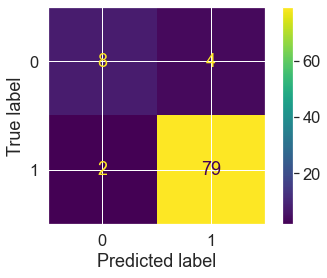

In [31]:
print("Matriz confusión SVM_stn_st_test")
ConfusionMatrixDisplay.from_predictions(test_y, pred_y_svm_stn_st_test) 

Matriz confusión SVM_stn_st_grid test


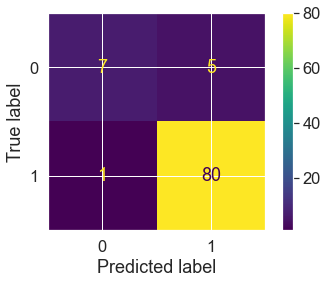

In [32]:
print("Matriz confusión SVM_stn_st_grid test")
ConfusionMatrixDisplay.from_predictions(test_y, y_pred_grid)

In [33]:
print("AUC SVM_stn_st_test", roc_auc_score(test_y, pred_y_svm_stn_st_test))
print("AUC SVM_stn_st_grid test", roc_auc_score(test_y, y_pred_grid))
print()
print("ACC SVM_stn_st_test", accuracy_score(test_y, pred_y_svm_stn_st_test))
print("ACC SVM_stn_st_grid test: ", accuracy_score(test_y, y_pred_grid))
print()
print("F1 score SVM_stn_st_test", f1_score(test_y, pred_y_svm_stn_st_test))
print("F1 score SVM_stn_st_grid test: ", f1_score(test_y, y_pred_grid))
print()
print("Precision SVM_stn_st_test", precision_score(test_y, pred_y_svm_stn_st_test))
print("Precision score SVM_stn_st_grid test: ", precision_score(test_y, y_pred_grid))
print()
print("Recall SVM_stn_st_test", recall_score(test_y, pred_y_svm_stn_st_test))
print("Recall SVM_stn_st_grid test: ", recall_score(test_y, y_pred_grid))


AUC SVM_stn_st_test 0.8209876543209876
AUC SVM_stn_st_grid test 0.7854938271604937

ACC SVM_stn_st_test 0.9354838709677419
ACC SVM_stn_st_grid test:  0.9354838709677419

F1 score SVM_stn_st_test 0.9634146341463414
F1 score SVM_stn_st_grid test:  0.963855421686747

Precision SVM_stn_st_test 0.9518072289156626
Precision score SVM_stn_st_grid test:  0.9411764705882353

Recall SVM_stn_st_test 0.9753086419753086
Recall SVM_stn_st_grid test:  0.9876543209876543


##### Combinación GridSearch

In [40]:
grid_svm_stn_st.best_params_.items()

dict_items([('C', 1), ('gamma', 0.1), ('kernel', 'rbf')])

Podemos concluir que tras estandarizar, tratar el desbalance de clases, optimizar los parámetros y comparar distintas métricas de evaluación que los resultados del modelo varían mínimamente respecto del modelo inicial (gamma 'auto', kernel 'rbf'). Posiblemente la configuración por defecto aún siendo relativamente 'simple' mejora la mejor combinación posible con los parámetros dados. No obstante la diferencia es mínima y los resultados siguen siendo considerablemente buenos.



#### Conclusiones:

- La inspección inicial de los datos nos permite identificar valores categóricos, nulos o fuera de rango que deben de ser tratados para la correcta aplicación de los modelos.
- Técnicas de desbalanceo de clases marcan la diferencia entre obtener un modelo con sobreajuste hacia la clase mayoritaria o con una buena generalización hacia conjuntos de datos de test.
- La normalización evita que variables con rangos distintos puedan provocar una influencia no deseada en la creación del modelo. Modelos de clasificación basados en distancias son especialmente sensibles a estas situaciones (KNN, SVM,..)
- Las métricas obtenidas mediante CrossValidation nos dan más seguridad a la hora de sacar conclusiones sobre los resultados de predicción del conjunto de entrenamiento. Una única partición de los datos en trainig y test puede provocar que los resultados obtenidos provengan de un conjunto de datos no generalmente representativos. Mediante CrossValidation el total de instancias ha sido utiliza una vez para training y otra para validación. Existen multiples técnicas de validación dependiendo de la forma de partición de los datos GroupCrossValidation, Leave One Out, Shuffle Split,..
- Facilitándonos la búsqueda de la combinación más óptima de hiperparámetros tenemos GridSearch o RandomSearch. Se ha demostrado que GridSearch obtiene la mejor combinación de hiperparámetros aunque con un coste computacional más alto. La combinación de RandomSearch y GridSearch soluciona en parte el problema computacional de GridSearch inicialmente opteniendo los parámetros más representativos de un conjunto con RandomSearch y posteriormente buscando la combinación mas óptima entre estos con GridSearch.
- Las elección de la métrica debe de ser estudiada en base al conjunto de datos con el que se este evaluando el modelo. Vemo como ACC en dataset desbalanceados puede proporcionar buenos resultados de modelos poco generalistas. AUC es una métrica más robusta en situaciones de desbalanceo de clases realizando predicciones sobre todos los valores umbrales de probabilidad posibles.